In [ ]:
#In this project by using data model finally will be predicting whether item seen by sonar was a mine or a rock.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('sonar.all-data.csv')
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [7]:
                            #Making sure that data is correctly preprocessed
df['Label'].value_counts()
df.isnull().sum().sort_values(ascending=True)

Freq_1     0
Freq_33    0
Freq_34    0
Freq_35    0
Freq_36    0
          ..
Freq_26    0
Freq_27    0
Freq_28    0
Freq_30    0
Label      0
Length: 61, dtype: int64

<AxesSubplot:>

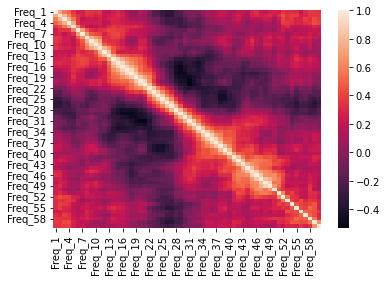

In [8]:
                 #Getting acknowledged with data
sns.heatmap(df.corr())

In [9]:
df.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [10]:
#Dealing with categorical labels to check correlation
df['Label']=df['Label'].replace(['R','M'],[0,1])
#Check  labels with the best correlation
df.corr()['Label'].apply(abs)
df.corr()['Label'].sort_values(ascending=False).head(6)

Label      1.000000
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Label, dtype: float64

In [15]:
                             #Starting with creating a model

    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Firstly splitting on train/test split
X=df.drop('Label',axis=1)
y=df['Label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

#Scaling not to have large numbers
scaler = StandardScaler()
knn= KNeighborsClassifier()

#Usage of pipeline
operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

#Implementing KNN Classification with cross validation to choose the best k param
grid_params = {'knn__n_neighbors':list(range(1,25))}
grid_model = GridSearchCV(pipe,grid_params,cv=5,scoring='accuracy')

In [16]:
# Performing my grid model
grid_model.fit(X_train,y_train)
pred = grid_model.predict(X_test)

grid_model.best_params_

{'knn__n_neighbors': 2}

Text(0, 0.5, 'Mean_test_score')

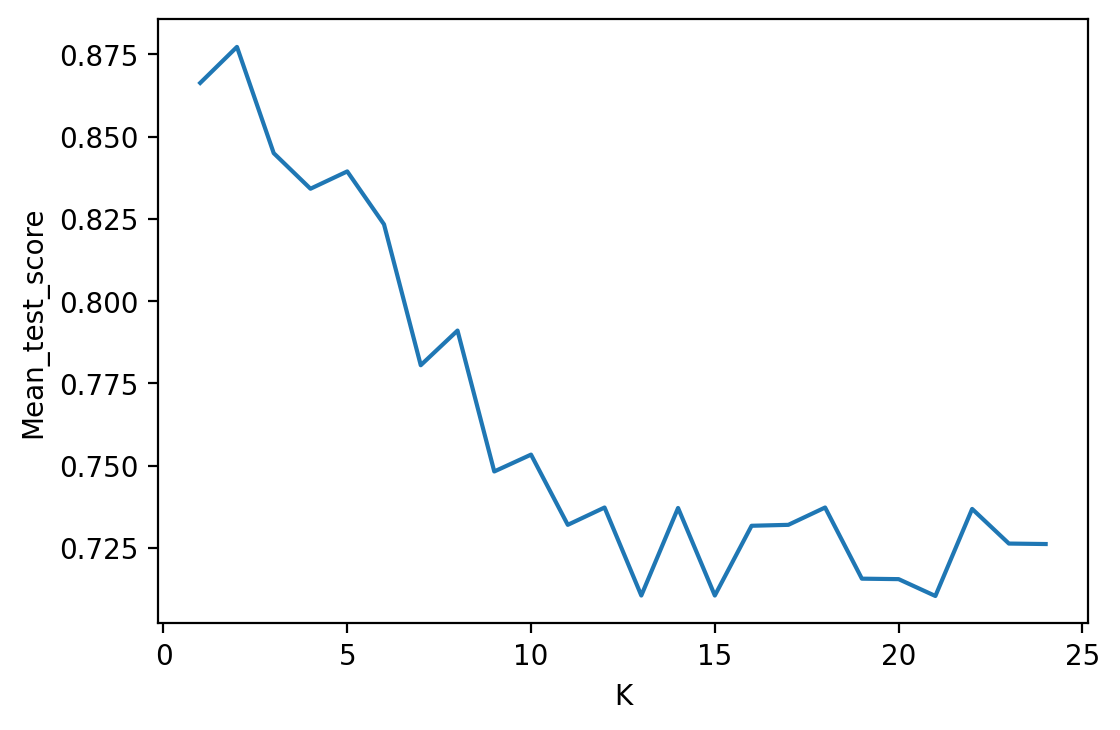

In [17]:
#Check  some fun stuff
mean=grid_model.cv_results_['mean_test_score']
plt.figure(dpi=200)
plt.plot(list(range(1,25)),mean)
plt.xlabel("K")
plt.ylabel("Mean_test_score")

In [22]:
                #Final evaluation of performance
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.82      1.00      0.90         9

    accuracy                           0.90        21
   macro avg       0.91      0.92      0.90        21
weighted avg       0.92      0.90      0.91        21



In [23]:
confusion_matrix(y_test,pred)

array([[10,  2],
       [ 0,  9]], dtype=int64)

In [ ]:
# We can see that our model has an accuracy of 90%